--------------------
#### Visualization of SVM Kernels Linear, RBF, Poly and Sigmoid 
--------------------------

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.svm import SVC

In [2]:
h = .02  # step size in the mesh

In [2]:
names = ["Linear SVM", "RBF SVM", "Poly SVM", "Sigmoid SVM"]

classifiers = [
    SVC(kernel="linear",  C=0.025),
    SVC(kernel='rbf',     gamma=2, C=1),
    SVC(kernel="poly",    C=0.025),
    SVC(kernel="sigmoid", gamma=2)]


#### generate datasets

#### 1. linearly separable data

In [3]:
X, y = make_classification(n_samples=100,
                           n_features=2, 
                           n_redundant=0, 
                           n_informative=2,
                           random_state=1, 
                           class_sep=2)

rng  = np.random.RandomState(2)
X  += 2 * rng.uniform(size=X.shape)

linearly_separable = (X, y)

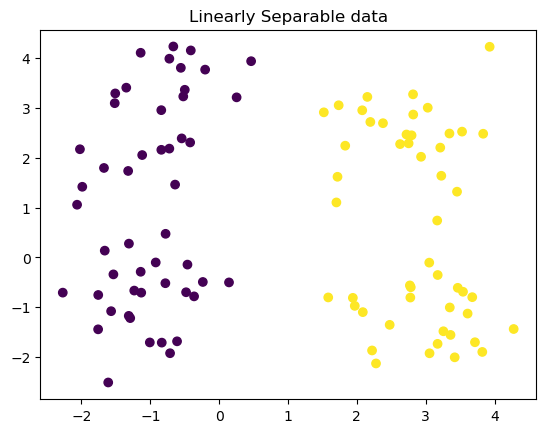

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Linearly Separable data');

#### 2. Semi circle moon data

The make_moons() function is for binary classification and will generate a swirl pattern, or two moons.

You can control how noisy the moon shapes are and the number of samples to generate.

In [5]:
X_semi_circle, y_semi_circle = make_moons(n_samples=100, noise=0.15, random_state=1)

semi_circle_moons = (X_semi_circle, y_semi_circle)

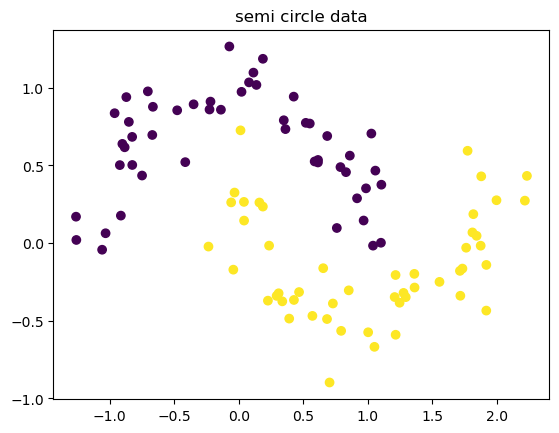

In [6]:
plt.scatter(X_semi_circle[:, 0], X_semi_circle[:, 1], c=y_semi_circle)
plt.title('semi circle data');

#### 3. Concentric circles

The make_circles() function generates a binary classification problem with datasets that fall into concentric circles.

Again, as with the moons test problem, you can control the amount of noise in the shapes.

In [7]:
X_con_circles, y_con_circles = make_circles(n_samples=100, noise=0.1, factor=0.5, random_state=1)

concentric_circles = (X_con_circles, y_con_circles)

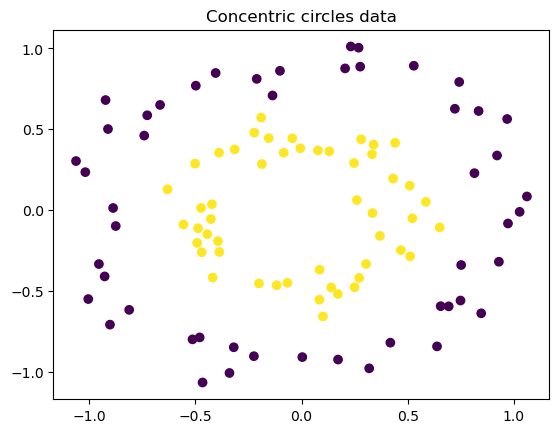

In [8]:
plt.scatter(X_con_circles[:, 0], X_con_circles[:, 1], c=y_con_circles)
plt.title('Concentric circles data');

In [9]:
datasets = [linearly_separable, semi_circle_moons, concentric_circles ]
h = .01

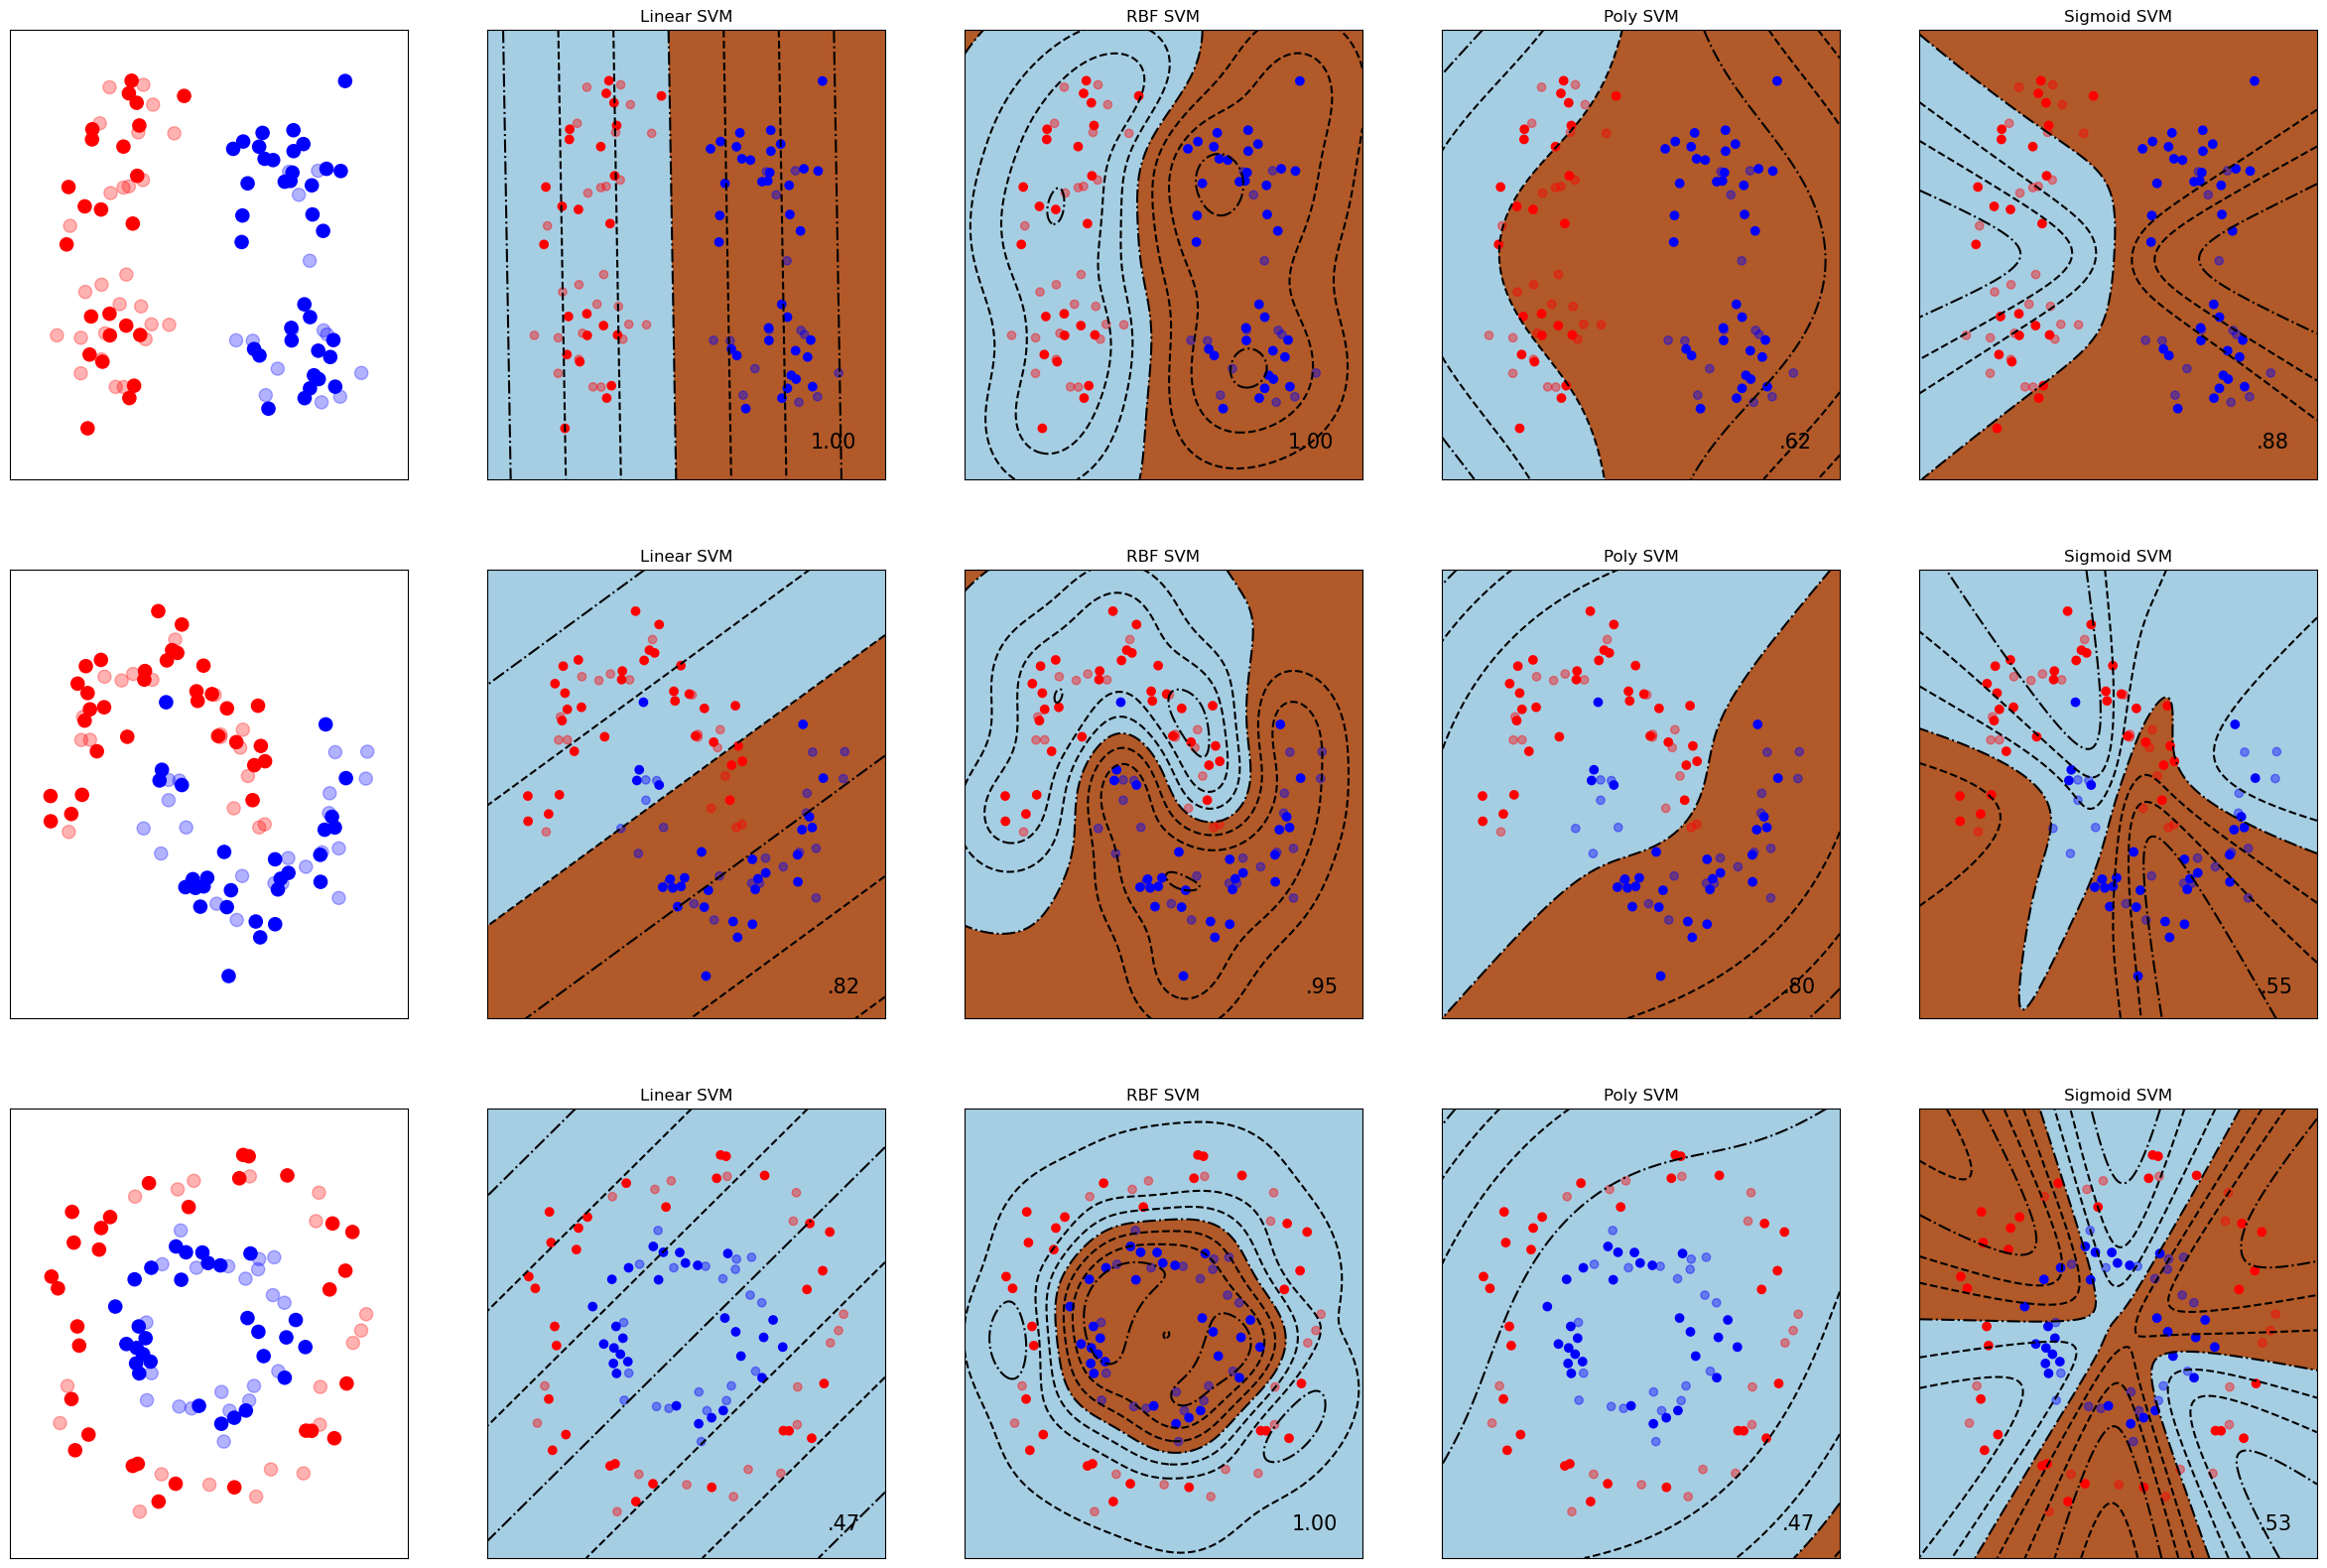

In [10]:
figure = plt.figure(figsize=(30, 20))
i = 1

# iterate over datasets
for ds in datasets:
    # preprocess dataset, split into training and test part
    X, y = ds
    
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm        = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    ax        = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=90, cmap=cm_bright)
    
    # and testing points
    ax.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  s=90, cmap=cm_bright, alpha=0.3)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, m_max]x[y_min, y_max].
        
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        
        plt.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Paired, shading='auto')
    
        plt.contour(xx, 
                    yy, 
                    Z, 
                    colors=['k', 'k', 'k'], 
                    linestyles=['--', '-.', '--'],
                    #levels=[-.5, 0, .5]
                   )
        
        #ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        
        # and testing points
        ax.scatter(X_test[:, 0],  X_test[:, 1],  c=y_test,  cmap=cm_bright, alpha=0.4)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
